In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import csv

In [2]:
from enums import stage_dict, char_dict, platform_dict, dan_names_dict
from read_data import read_data_into_dataframe
from data_processing import get_unique_players, calculate_win_rates, get_most_popular_characters, get_rank_distribution, split_unique_players, split_replays_into_categories, calculate_percentiles
from plotting import plot_win_rates, plot_win_rates_with_confidence_intervals, plot_most_popular_characters, plot_rank_distribution

In [3]:
%matplotlib inline  

In [4]:
jsons_directory = './complete_JSONS_03_01/'
master_df = read_data_into_dataframe(jsons_directory)

Read 1738260 games from 1740 files
524 files were unable to be read


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664335 entries, 999 to 1738259
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   battleId       664335 non-null  object
 1   battleType     664335 non-null  int64 
 2   gameVersion    664335 non-null  int64 
 3   winResult      664335 non-null  int64 
 4   totalRoundNum  664335 non-null  int64 
 5   battleAt       664335 non-null  int64 
 6   viewNum        664335 non-null  int64 
 7   stageId        664335 non-null  object
 8   highlightFlag  664335 non-null  bool  
 9   1pUserId       664335 non-null  object
 10  1pPlayerName   664335 non-null  object
 11  1pPolarisId    664335 non-null  object
 12  1pOnlineId     664335 non-null  object
 13  1pNgWordFlag   664335 non-null  int64 
 14  1pPlatform     664335 non-null  int64 
 15  1pRank         664335 non-null  int64 
 16  1pTekkenPower  664335 non-null  int64 
 17  1pCharaId      664335 non-null  object
 18  1pWinR

In [6]:
unique_players = get_unique_players(master_df)
beginner_players, intemediate_players, advanced_players = split_unique_players(unique_players)
beginner_games, intermediate_games, advanced_games = split_replays_into_categories(master_df)

In [7]:
print('Number of unique players:', len(unique_players))
print('Number of beginner players:', len(beginner_players))
print('Number of intermediate players:', len(intemediate_players))
print('Number of advanced players:', len(advanced_players))
print('')
print('Number of unique games:', len(master_df))
print('Number of beginner games:', len(beginner_games))
print('Number of intermediate games:', len(intermediate_games))
print('Number of advanced games:', len(advanced_games))
print('')
print(f'{len(master_df) - (len(beginner_games) + len(intermediate_games) + len(advanced_games))} games were not categorized as they were played by players of from different categories')

Number of unique players: 221829
Number of beginner players: 92361
Number of intermediate players: 94916
Number of advanced players: 34552

Number of unique games: 664335
Number of beginner games: 188897
Number of intermediate games: 221381
Number of advanced games: 93973

160084 games were not categorized as they were played by players of from different categories


In [8]:
brackets_dict = {
	'beginner': {
		'players': beginner_players,
		'games': beginner_games
		},
		'intermediate': {
			'players': intemediate_players,
			'games': intermediate_games
		},
		'advanced': {
			'players': advanced_players,
			'games': advanced_games
		},
} 


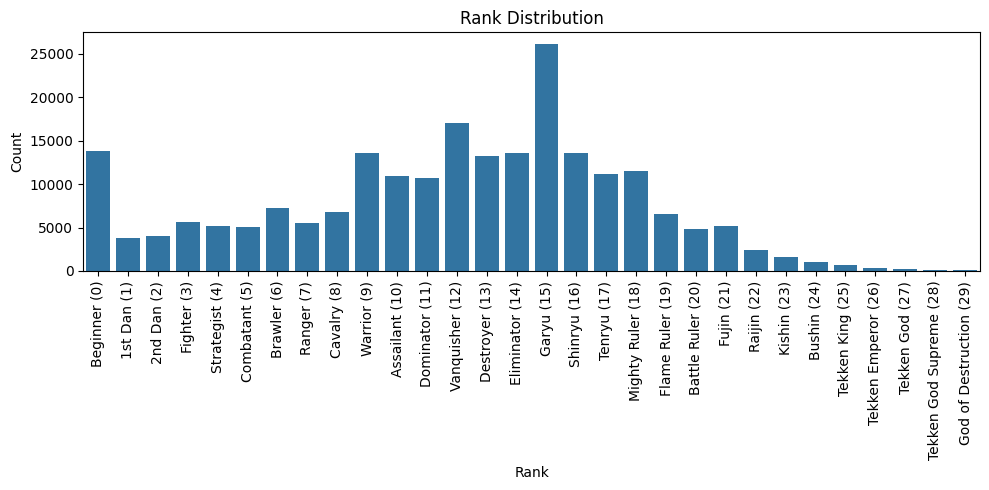

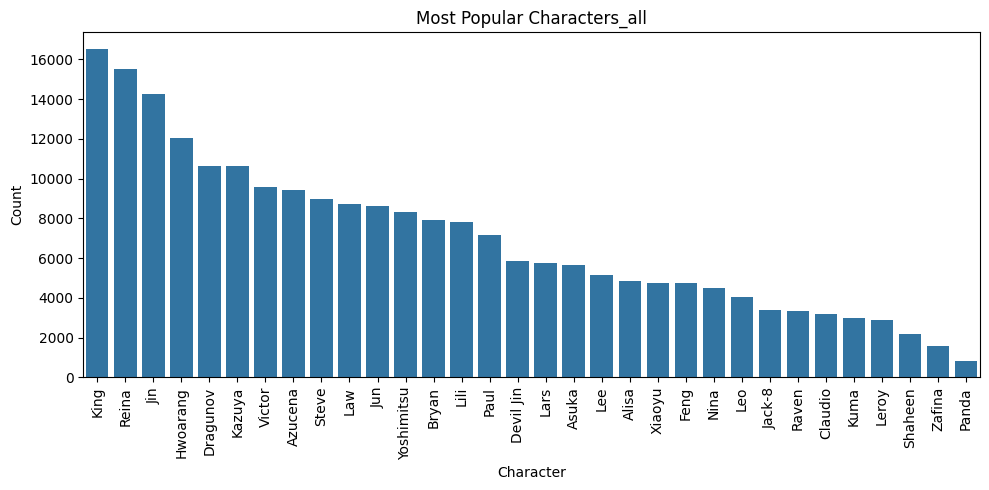

Number of mirror matches: 28173
Number of matches with draws: 0


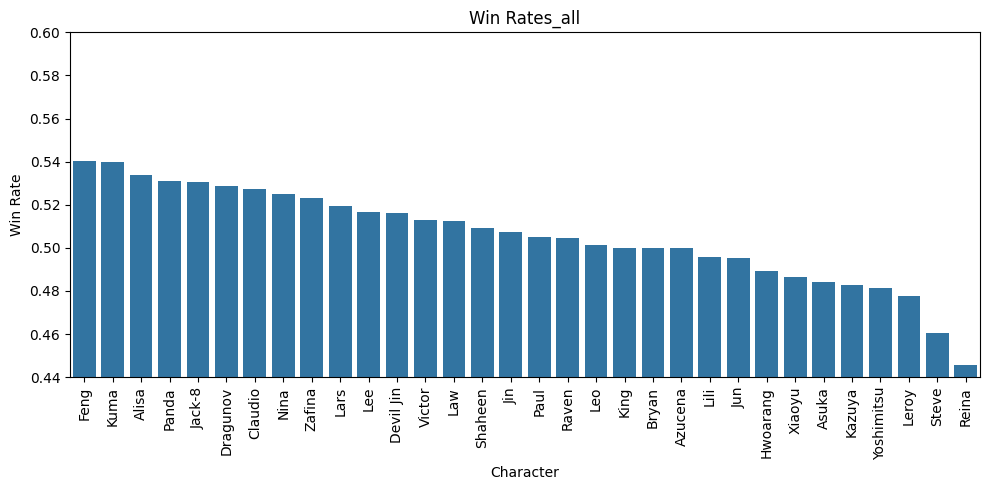

Number of mirror matches: 8094
Number of matches with draws: 0


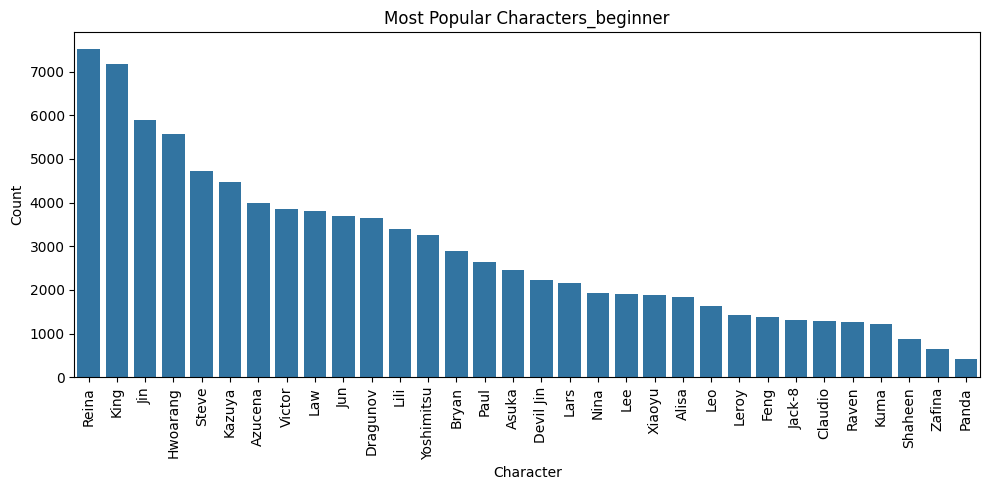

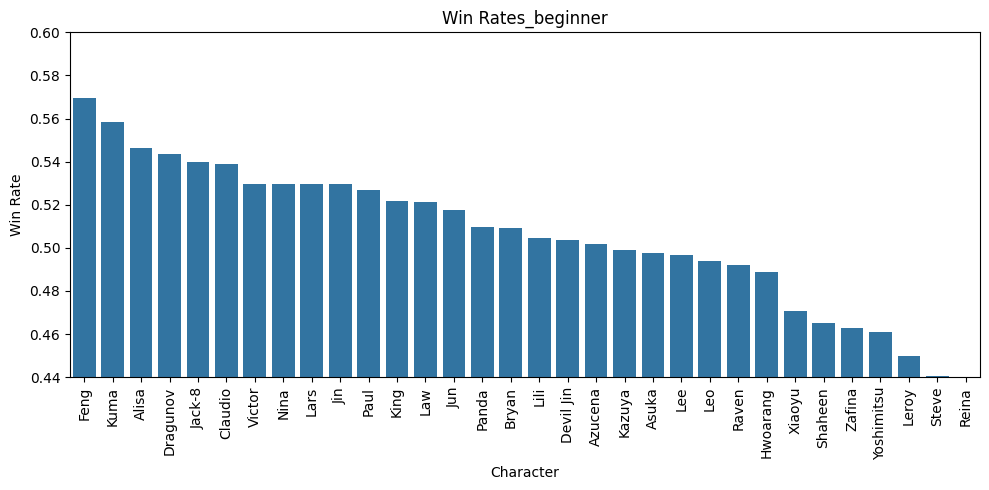

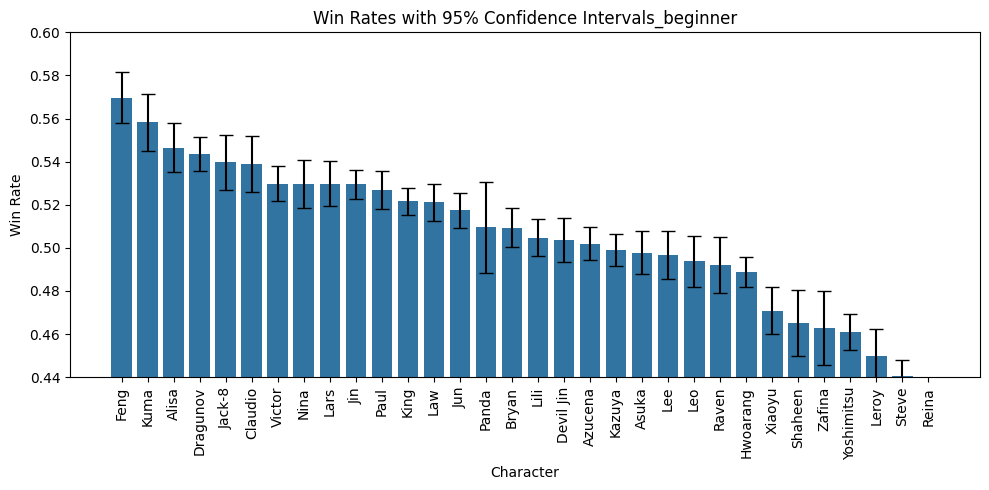

Number of mirror matches: 9331
Number of matches with draws: 0


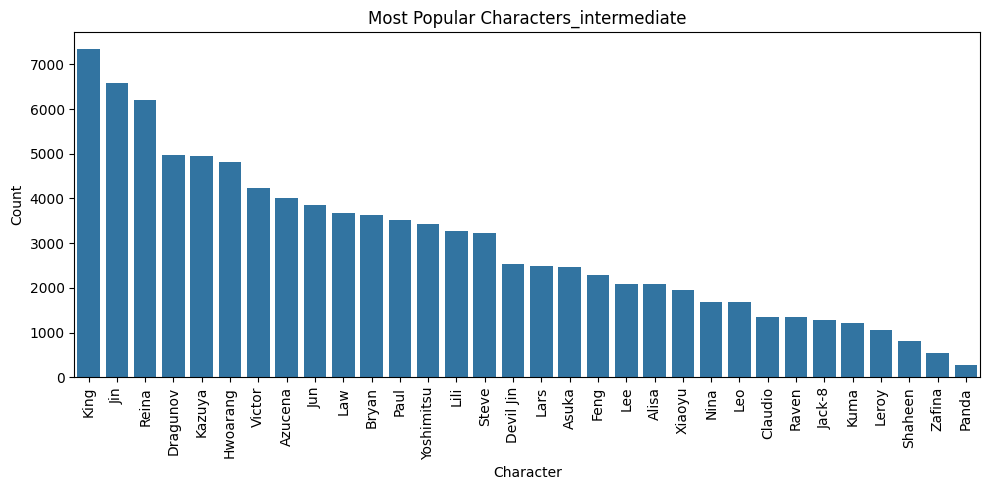

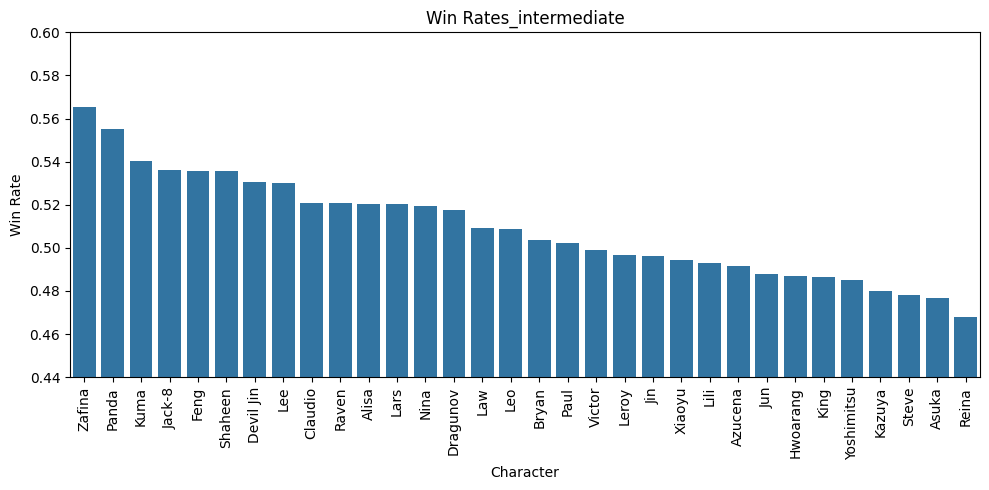

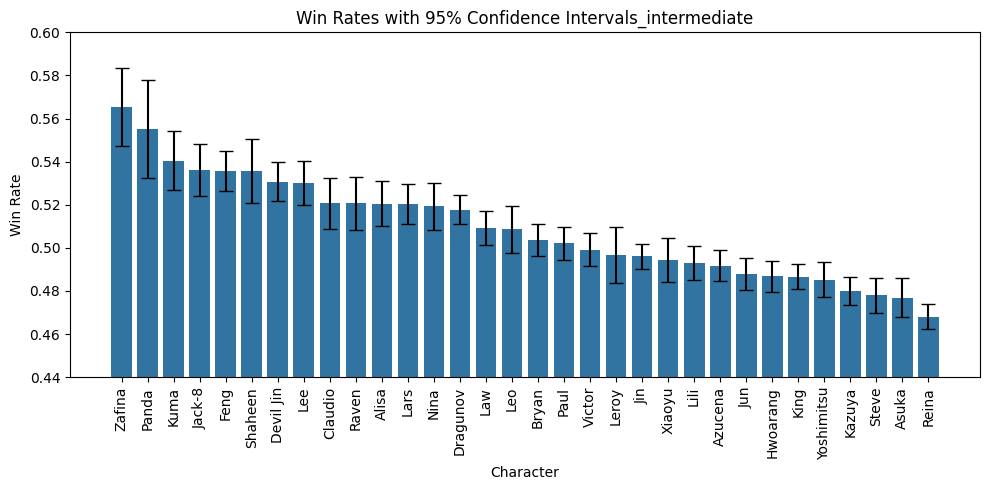

Number of mirror matches: 3677
Number of matches with draws: 0


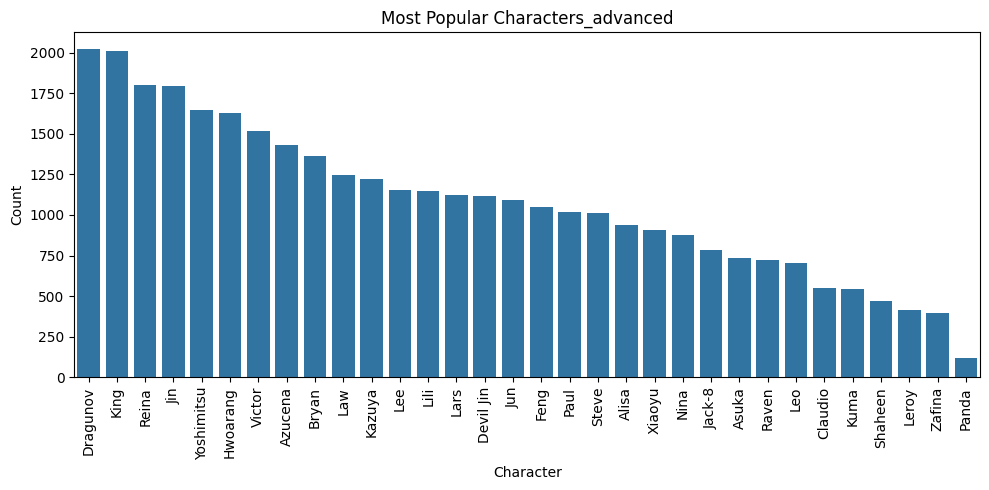

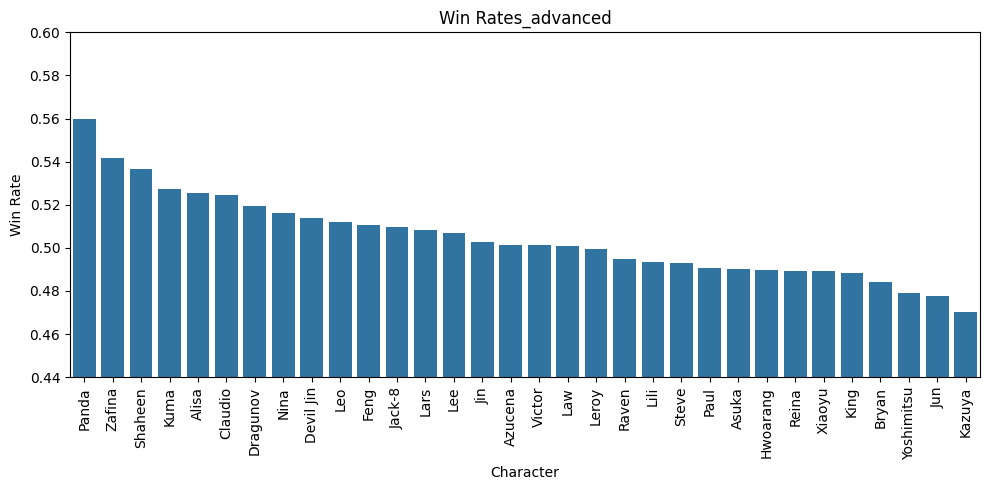

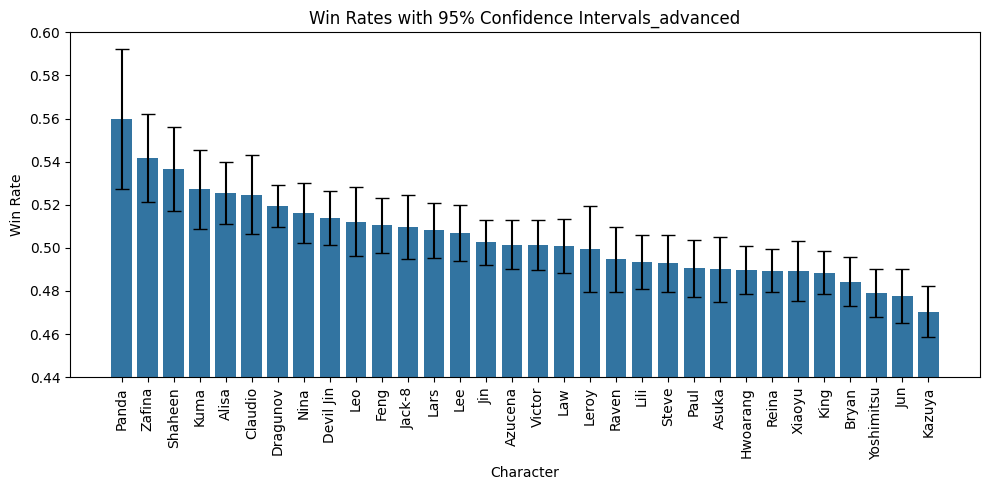

In [9]:
rank_counts = get_rank_distribution(unique_players)
plot_rank_distribution(rank_counts)
character_counts = get_most_popular_characters(unique_players)
plot_most_popular_characters(character_counts, 'all')
win_rates, confidence_intervals = calculate_win_rates(master_df)
plot_win_rates(win_rates, 'all')


for bracket in brackets_dict:
    character_counts = get_most_popular_characters(brackets_dict[bracket]['players'])
    games = brackets_dict[bracket]['games']
    win_rates, confidence_intervals = calculate_win_rates(games)
    plot_most_popular_characters(character_counts, bracket)
    plot_win_rates(win_rates, bracket)
    plot_win_rates_with_confidence_intervals(win_rates, confidence_intervals, bracket)

In [10]:
calculate_percentiles(rank_counts)

{'Beginner': 0.0,
 '1st Dan': 6.218303287667528,
 '2nd Dan': 7.921867744974732,
 'Fighter': 9.714239346523673,
 'Strategist': 12.25718909610556,
 'Combatant': 14.609000626608784,
 'Brawler': 16.91843717458042,
 'Ranger': 20.18176162719933,
 'Cavalry': 22.65393613999973,
 'Warrior': 25.740547899508183,
 'Assailant': 31.871396435993493,
 'Dominator': 36.787796005030906,
 'Vanquisher': 41.63612512340586,
 'Destroyer': 49.32402886908384,
 'Eliminator': 55.31017134820064,
 'Garyu': 61.44192148005897,
 'Shinryu': 73.24696049659873,
 'Tenryu': 79.36473590017536,
 'Mighty Ruler': 84.42403833583526,
 'Flame Ruler': 89.6370627825938,
 'Battle Ruler': 92.57987008010676,
 'Fujin': 94.76668965734868,
 'Raijin': 97.11624719941938,
 'Kishin': 98.22070153135975,
 'Bushin': 98.92124113619049,
 'Tekken King': 99.36482605971267,
 'Tekken Emperor': 99.6695652957909,
 'Tekken God': 99.83590964211172,
 'Tekken God Supreme': 99.9206596071749,
 'God of Destruction': 99.964386982766}

In [11]:
# quick test to make sure the average win rate is close to 50%
# it should be exactly 50% since there is a win and a loss for each game
# but that is not the case since we are not considering the play rate of each character in this simple calculation

win_rates, _ = calculate_win_rates(master_df)

average_win_rate = sum(win_rates.values()) / len(win_rates)
if abs(average_win_rate - 0.5) < 0.05:
    print(f"The average win rate ({average_win_rate}) is close to 50%.")
else:
    print(f"The average win rate ({average_win_rate})is not close to 50%.")


Number of mirror matches: 28173
Number of matches with draws: 0
The average win rate (0.5057204071362668) is close to 50%.


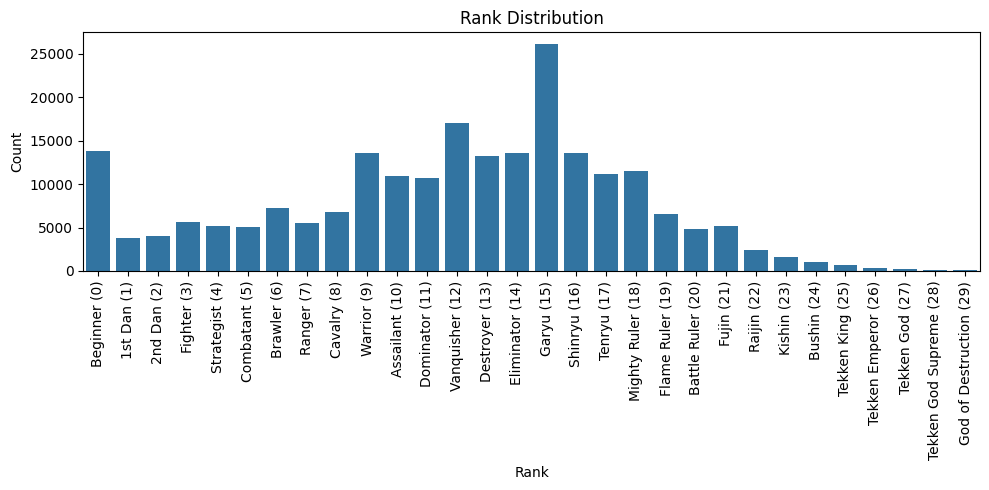

In [12]:
plot_rank_distribution(rank_counts)

In [13]:
# lets count how many players there are on each platform using unique_players
platform_counts = Counter([data['platform'] for user_id, data in unique_players.items()])
platform_counts = dict(platform_counts)
platform_counts = {k: v for k, v in sorted(platform_counts.items(), key=lambda item: item[1], reverse=True)}

# replace the platform names with the actual names from the platform dictionary
platform_counts = {platform_dict[k]: v for k, v in platform_counts.items()}

# lets normalize the counts
total = sum(platform_counts.values())
platform_counts = {k: v/total for k, v in platform_counts.items()}

# combine ps? and xbox? into a single category
platform_counts['console'] = platform_counts[platform_dict[8]] + platform_counts[platform_dict[9]]


platform_counts

{'pc': 0.5415162129387951,
 'console/PS?': 0.37757912626392404,
 'console/XBOX?': 0.08090466079728079,
 'console': 0.45848378706120485}

In [14]:
# let's save the unique players dictionary to a csv file

with open('unique_players.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['user_id', 'rank', 'char', 'platform', 'tekken_power', 'characters'])
    for user_id, data in unique_players.items():
        writer.writerow([user_id, data['rank'], data['char'], platform_dict[data['platform']], data['tekken_power'], data['characters']])

# now let's do the same for the master dataframe
    
# let's first remove duplicate replays based on the battleId   

# let's save the master dataframe to a csv file
master_df.to_csv('replays.csv', index=False)

In [16]:
import yaml

win_rates, confidence_intervals = calculate_win_rates(master_df)
# Calculate win rates for each bracket
beginner_win_rates, beginner_confidence_intervals = calculate_win_rates(beginner_games)
intermediate_win_rates, intermediate_confidence_intervals = calculate_win_rates(intermediate_games)
advanced_win_rates, advanced_confidence_intervals = calculate_win_rates(advanced_games)

Number of mirror matches: 8094
Number of matches with draws: 0
Number of mirror matches: 9331
Number of matches with draws: 0
Number of mirror matches: 3677
Number of matches with draws: 0


In [19]:
# Compile the visual data into a single YAML report
report_data = {
    'Number of unique players': len(unique_players),
    'Number of beginner players': len(beginner_players),
    'Number of intermediate players': len(intemediate_players),
    'Number of advanced players': len(advanced_players),
    'Number of unique games': len(master_df),
    'Number of beginner games': len(beginner_games),
    'Number of intermediate games': len(intermediate_games),
    'Number of advanced games': len(advanced_games),
    'Average win rate': average_win_rate,
    'Rank distribution': rank_counts,
    'Platform distribution': platform_counts,
    'Character counts': character_counts,
    'Beginner win rates': beginner_win_rates,
    'Beginner confidence intervals': beginner_confidence_intervals,
    'Intermediate win rates': intermediate_win_rates,
    'Intermediate confidence intervals': intermediate_confidence_intervals,
    'Advanced win rates': advanced_win_rates,
    'Advanced confidence intervals': advanced_confidence_intervals
}

with open('report.yaml', 'w') as f:
    yaml.safe_dump(report_data, f, sort_keys=False)
